In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
#Show graphs withint Python notebook

%matplotlib inline

In [2]:
df = pd.read_csv('responses_survey_pyth.csv')
df.columns

Index(['Timestamp', '1. Gender', '2. Age',
       '3. How many people in your family ?',
       '1. What kinds of product do you regularly purchase? (สินค้าประเภทไหนที่คุณซื้อเป็นประจำ?)',
       '2. How often do you purchase those grocery products? (คุณซื้อสินค้าบ่อยแค่ไหน?)',
       '3. Where do you buying the products? (คุณซื้อสินค้าที่ไหน?)',
       '4. Have you ever you any online applications for buying? (คุณเคยซื้อของผ่านแอปพลิเคชั่นออนไลน์เหล่านี้หรือไม่)',
       '5. Do you prefer to use the same brand for buying the products? (คุณชอบซื้อสินค้าแบรนด์เดิมมาใช้หรือไม่)',
       '6. Which of the following situation is the most relevant to you? (พฤติกรรมใด ตรงกับคุณมากที่สุด?)',
       '7. What is problem you have experienced during shopping grocery? (e.g. forget to buy run out item, too busy to go shopping, take some time to find stuff, etc.) (คุณประสบปัญหาอะไรบ้าง ในการซื้อสินค้าที่ใช้เป็นประจำ?)',
       '8. What do you concern about or expect from online shopping platform? (คุ

In [3]:
df = df.drop(columns=['Timestamp'])

In [4]:
df.columns

Index(['1. Gender', '2. Age', '3. How many people in your family ?',
       '1. What kinds of product do you regularly purchase? (สินค้าประเภทไหนที่คุณซื้อเป็นประจำ?)',
       '2. How often do you purchase those grocery products? (คุณซื้อสินค้าบ่อยแค่ไหน?)',
       '3. Where do you buying the products? (คุณซื้อสินค้าที่ไหน?)',
       '4. Have you ever you any online applications for buying? (คุณเคยซื้อของผ่านแอปพลิเคชั่นออนไลน์เหล่านี้หรือไม่)',
       '5. Do you prefer to use the same brand for buying the products? (คุณชอบซื้อสินค้าแบรนด์เดิมมาใช้หรือไม่)',
       '6. Which of the following situation is the most relevant to you? (พฤติกรรมใด ตรงกับคุณมากที่สุด?)',
       '7. What is problem you have experienced during shopping grocery? (e.g. forget to buy run out item, too busy to go shopping, take some time to find stuff, etc.) (คุณประสบปัญหาอะไรบ้าง ในการซื้อสินค้าที่ใช้เป็นประจำ?)',
       '8. What do you concern about or expect from online shopping platform? (คุณกังวล หรือ คาดหวังก

In [5]:
df=df.rename(columns={'1. Gender':'sex', '2. Age':'age', '3. How many people in your family ?':'family',
                      '1. What kinds of product do you regularly purchase? (สินค้าประเภทไหนที่คุณซื้อเป็นประจำ?)':'products',
                      '2. How often do you purchase those grocery products? (คุณซื้อสินค้าบ่อยแค่ไหน?)':'often',
                      '3. Where do you buying the products? (คุณซื้อสินค้าที่ไหน?)':'channel',
                      '4. Have you ever you any online applications for buying? (คุณเคยซื้อของผ่านแอปพลิเคชั่นออนไลน์เหล่านี้หรือไม่)':'app',
                      '5. Do you prefer to use the same brand for buying the products? (คุณชอบซื้อสินค้าแบรนด์เดิมมาใช้หรือไม่)':'same brand',
                      '6. Which of the following situation is the most relevant to you? (พฤติกรรมใด ตรงกับคุณมากที่สุด?)':'behaviors',
                      '7. What is problem you have experienced during shopping grocery? (e.g. forget to buy run out item, too busy to go shopping, take some time to find stuff, etc.) (คุณประสบปัญหาอะไรบ้าง ในการซื้อสินค้าที่ใช้เป็นประจำ?)':'Problem',
                      '8. What do you concern about or expect from online shopping platform? (คุณกังวล หรือ คาดหวังกับการซื้อสินค้าที่ใช้เป็นประจำผ่านทางออนไลน์อะไรบ้าง?)':'online problem',
                      '1. How do you feel about Grocery Shopping Application?':'rate',
                      '2. Do you think our application can fix your problem?':'effectiveness',
                      '3. Any suggestions or comments?':'comment'
                       })
df.columns

Index(['sex', 'age', 'family', 'products', 'often', 'channel', 'app',
       'same brand', 'behaviors', 'Problem', 'online problem', 'rate',
       'effectiveness', 'comment'],
      dtype='object')

In [79]:
df['often'].replace('Once per week (1 ครั้ง/สัปดาห์)','once a week', inplace=True)
df['often'].replace('Once per month (1 ครั้ง/เดือน)','once a month', inplace=True)
df['often'].replace('Twice per month (2 ครั้ง/เดือน)','twice a month', inplace=True)
df['often'].replace('Once in 2-3 months (1 ครั้ง/2-3 เดือน)','once in 2-3 months', inplace=True)
df['often'].replace('Once in 4-6 months (1 ครั้ง/4-6 เดือน)','once in 4-6 months', inplace=True)

df['often'].value_counts()

once a month          11
twice a month          5
once a week            4
once in 2-3 months     4
once in 4-6 months     2
Name: often, dtype: int64

In [19]:
df['channel']

0     Online Platform (Please, answer the next quest...
1     Online Platform (Please, answer the next quest...
2     Online Platform (Please, answer the next quest...
3     Online Platform (Please, answer the next quest...
4     Online Platform (Please, answer the next quest...
5     Online Platform (Please, answer the next quest...
6     Online Platform (Please, answer the next quest...
7     Online Platform (Please, answer the next quest...
8     Online Platform (Please, answer the next quest...
9                     Onsite Store (e.g. Shopping mall)
10    Online Platform (Please, answer the next quest...
11    Online Platform (Please, answer the next quest...
12    Online Platform (Please, answer the next quest...
13    Online Platform (Please, answer the next quest...
14                    Onsite Store (e.g. Shopping mall)
15    Online Platform (Please, answer the next quest...
16    Online Platform (Please, answer the next quest...
17    Online Platform (Please, answer the next q

In [15]:
df['channel'].replace('Online Platform (Please, answer the next question)','online', inplace=True)
df['channel'].replace('Onsite Store (e.g. Shopping mall)','onsite', inplace=True)
df['channel'].replace('Online Platform (Please, answer the next question), Onsite Store (e.g. Shopping mall)','both', inplace=True)

df['channel'].value_counts()

both      11
online    10
onsite     5
Name: channel, dtype: int64

In [16]:
 d = {
...     'channel': ['online', 'onsite', 'both'],
...     'frequency': [10, 5, 11],
        'percent': ['38.46%', '19.23%', '42.31%']
... }
    
df_ = pd.DataFrame(data=d)

[Text(0.5, 1.0, 'Percentage of Grocery Shopping Channel')]

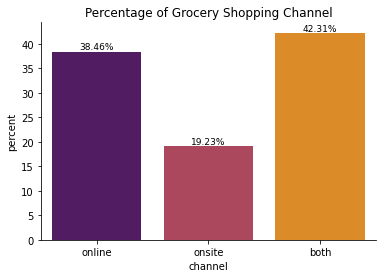

In [17]:
ax0 = sns.barplot(x="channel", y="frequency", palette="inferno", data=df_, estimator=lambda x: sum(x)*100.00/26)
ax0.set(ylabel="percent")
sns.despine(right = True)

for c in ax0.containers:
    labels = df_['percent']
    ax0.bar_label(c, labels=labels, label_type='edge', size=9)
    
ax0.set(title='Percentage of Grocery Shopping Channel')

In [57]:
df['sex'].value_counts()

Female    18
Male       5
LGBTQ+     3
Name: sex, dtype: int64

In [18]:
df_ch_oft = pd.DataFrame(df, columns=['channel','often'])

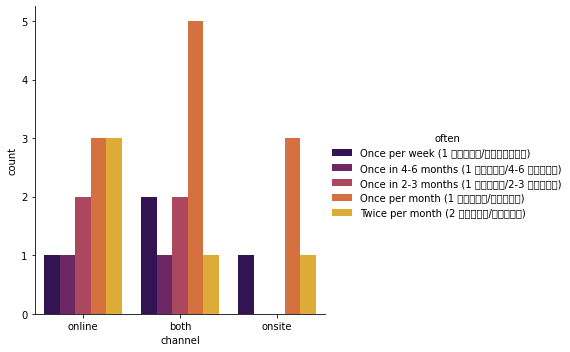

In [19]:
sns.catplot(x="channel", kind="count", hue = 'often', palette="inferno", data=df_ch_oft)

ValueError: No objects to concatenate

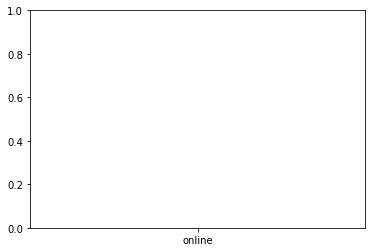

In [14]:
hue_order = ['once a week', 'once a month','twice a month','once in 2-3 months','once in 4-6 months']
             
g0 = sns.histplot(df_ch_oft, x="channel", hue="often", stat="percent", multiple="dodge"
                 , shrink=.8, palette="inferno", edgecolor="None", hue_order=hue_order)
sns.move_legend(g0, "upper left", bbox_to_anchor=(1, 1))
sns.despine(right = True)

g0.set(title='Percentage of Frequency Related to Channel')

In [280]:
df_s_oft = pd.DataFrame(df, columns=['sex','often'])
df_s_oft.head()

,sex,often
0,Male,once a week
1,Female,once in 4-6 months
2,Male,once in 2-3 months
3,Male,once a month
4,Female,once in 2-3 months


[Text(0.5, 1.0, 'Percentage of Frequency Related to Gender')]

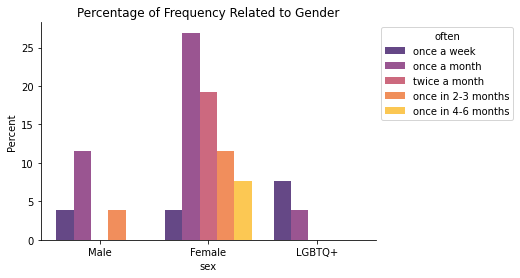

In [292]:
hue_order = ['once a week', 'once a month','twice a month','once in 2-3 months','once in 4-6 months']

g_ = sns.histplot(df_s_oft, x="sex", hue="often", stat="percent", multiple="dodge"
                 , shrink=.8, palette="inferno", edgecolor="None", hue_order=hue_order)
sns.move_legend(g_, "upper left", bbox_to_anchor=(1, 1))
sns.despine(right = True)
g_.set(title='Percentage of Frequency Related to Gender')

In [103]:
behaviors = [[5, 3, 5], [6, 2, 7], [2, 1, 4], [3, 1, 2]]
df_be = pd.DataFrame(behaviors, columns=['online', 'onsite', 'both'],
                  index=['Buy only item that almost runs out first',
                         'Make a plan to buy many stuff atonce',
                         'Always stock up more than 1piece for each item',
                         'Just buy 1 item for the particulartime'])
df_be

,online,onsite,both
Buy only item that almost runs out first,5,3,5
Make a plan to buy many stuff atonce,6,2,7
Always stock up more than 1piece for each item,2,1,4
Just buy 1 item for the particulartime,3,1,2


In [71]:
df_b_ch = pd.read_csv('behavior_channel.csv')
df_b_ch.head()

,Behaviors,Channel
0,Buy only item that almost runs out first,online
1,Buy only item that almost runs out first,online
2,Buy only item that almost runs out first,online
3,Buy only item that almost runs out first,online
4,Buy only item that almost runs out first,online


In [72]:
df_b_ch = df_b_ch.rename(columns={'Behaviors':'behavior', 'Channel':'channel'})

In [73]:
df_b_ch['behavior'].replace('Make a plan to buy many stuff atonce','Make a plan to buy many stuff at once', inplace=True)
df_b_ch['behavior'].replace('Always stock up more than 1piece for each item','Always stock up more than 1 piece for each item', inplace=True)
df_b_ch['behavior'].replace('Just buy 1 item for the particulartime','Just buy 1 item for the particular time', inplace=True)

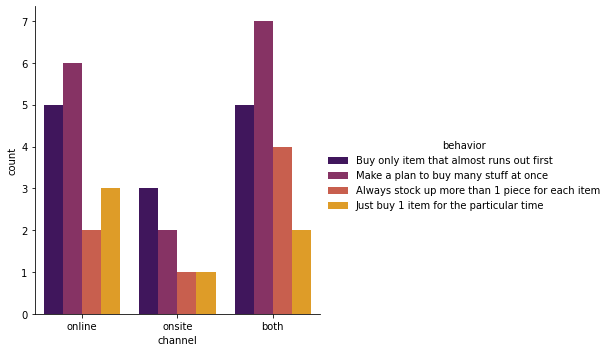

In [74]:
sns.catplot(x="channel", kind="count", hue = 'behavior', palette="inferno", data=df_b_ch)

[Text(0.5, 1.0, 'Percentage of Grocery Shopping Related to Channel')]

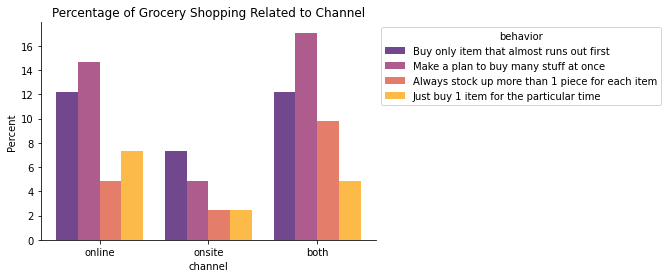

In [75]:
g = sns.histplot(df_b_ch, x="channel", hue="behavior", stat="percent", multiple="dodge"
             , shrink=.8, palette="inferno", edgecolor="None")
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
sns.despine(right = True)

g.set(title='Percentage of Grocery Shopping Related to Channel')



In [48]:
df_problem = pd.read_csv('problem.csv')
df_problem.all

<bound method NDFrame._add_numeric_operations.<locals>.all of                                problem  frequency percent  Unnamed: 3
0              Afraid of fake products          1   3.85%         NaN
1              Too busy/lazy to go out          3  11.54%         NaN
2                       Limited budget          2   7.69%         NaN
3       Wanted product is out of stock          7  26.92%         NaN
4   Uncertain cost of the same product          1   3.85%         NaN
5                   Too expensive cost          1   3.85%         NaN
6      Struggle with finding new brand          1   3.85%         NaN
7                        Forget to buy          5  19.23%         NaN
8        Too many items to buy at once          1   3.85%         NaN
9          Buy too much off-list items          1   3.85%         NaN
10             Hard to find some items          1   3.85%         NaN
11                        No promotion          1   3.85%         NaN
12          No longer produc

In [49]:
df_problem.columns

Index(['problem', 'frequency', 'percent', 'Unnamed: 3'], dtype='object')

[Text(0.5, 1.0, 'Percentage of Current Grocery Shopping Problems')]

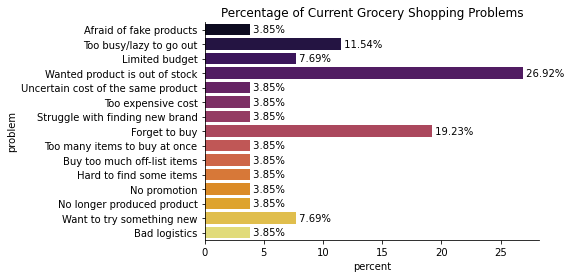

In [50]:
ax = sns.barplot(x="frequency", y="problem", data=df_problem, estimator=lambda x: sum(x)*100.00/26
                 , palette="inferno")
ax.set(xlabel="percent")
sns.despine(right = True)

for c in ax.containers:
    
    # custom label calculates percent and add an empty string so 0 value bars don't have a number
    labels = ' ' + df_problem['percent']
    # f'{h/data.who.count()*100:0.1f}%'
    ax.bar_label(c, labels=labels, label_type='edge', size=10)
    
ax.set(title='Percentage of Current Grocery Shopping Problems')

In [54]:
df_problem = pd.read_csv('problem_gen.csv')
df_problem.dropna(inplace=True)
df_problem = df_problem.rename(columns={'Gender':'sex'})
df_problem.columns

Index(['problem', 'sex'], dtype='object')

In [55]:
df_problem.all

<bound method NDFrame._add_numeric_operations.<locals>.all of                                problem     sex
0              Afraid of fake products    Male
1              Too busy/lazy to go out  Female
2                       Limited budget    Male
3       Wanted product is out of stock    Male
4   Uncertain cost of the same product  Female
5                   Too expensive cost  Female
6       Wanted product is out of stock  LGBTQ+
7                        Bad logistics  Female
8      Struggle with finding new brand  Female
9       Wanted product is out of stock  Female
10      Wanted product is out of stock  Female
11                       Forget to buy  Female
12                       Forget to buy  Female
13       Too many items to buy at once  Female
14                       Forget to buy  Female
15         Buy too much off-list items  Female
16             Hard to find some items  LGBTQ+
17      Wanted product is out of stock  LGBTQ+
18             Too busy/lazy to go out  Femal

[Text(0.5, 1.0, 'Percentage of Grocery Shopping Problems Related to Gender')]

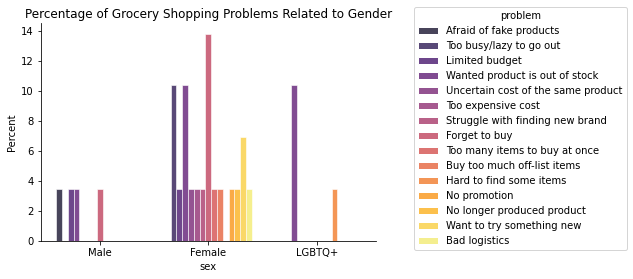

In [69]:
hue_order = ['Afraid of fake products',
             'Too busy/lazy to go out',
             'Limited budget',
             'Wanted product is out of stock',
             'Uncertain cost of the same product',
             'Too expensive cost',
             'Struggle with finding new brand',
             'Forget to buy',
             'Too many items to buy at once',
             'Buy too much off-list items',
             'Hard to find some items',
             'No promotion',
             'No longer produced product',
             'Want to try something new',
             'Bad logistics'
            ]

g_ = sns.histplot(df_problem, x="sex", hue="problem", stat="percent", multiple="dodge"
                 , shrink=.8, palette="inferno", edgecolor="white", hue_order=hue_order)
sns.move_legend(g_, "upper left", bbox_to_anchor=(1.1, 1.1))
sns.despine(right = True)
g_.set(title='Percentage of Grocery Shopping Problems Related to Gender')